In [1]:
import vtuIO
import matplotlib.pyplot as plt
import numpy as np
import plot_settings

In [9]:
files = {"TH2M": "../study/DeVries/TH2M/results/TH2M_run_10_Q53_genpower_Residual_res10.pvd",
         "TH2M_const_pGR": "../study/DeVries/TH2M_const_pGR/results/TH2M_const_pGR_run_10_Q53_genpower_Residual_res10.pvd",
         "TRM":  "../study/DeVries/TRM/results/TRM_run_10_Q53_genpower_Residual_res10.pvd"}
colors = {"TH2M": "b",
          "TH2M_const_pGR": "g",
          "TRM": "r"}

In [3]:
vars = ["temperature", "saturation"]
pts = {"GBM1": (0.590625,0,0),
"GBM2": (0.9625,0,0),
"GBM3": (1.35625,0,0)}

In [4]:
pvdobj = {}
results = {}
for file in files:
    pvdobj[file] = vtuIO.PVDIO(files[file], dim=2)
    results[file] = pvdobj[file].read_time_series(vars, pts=pts)

In [5]:
yearsinseconds = 3600*24*365

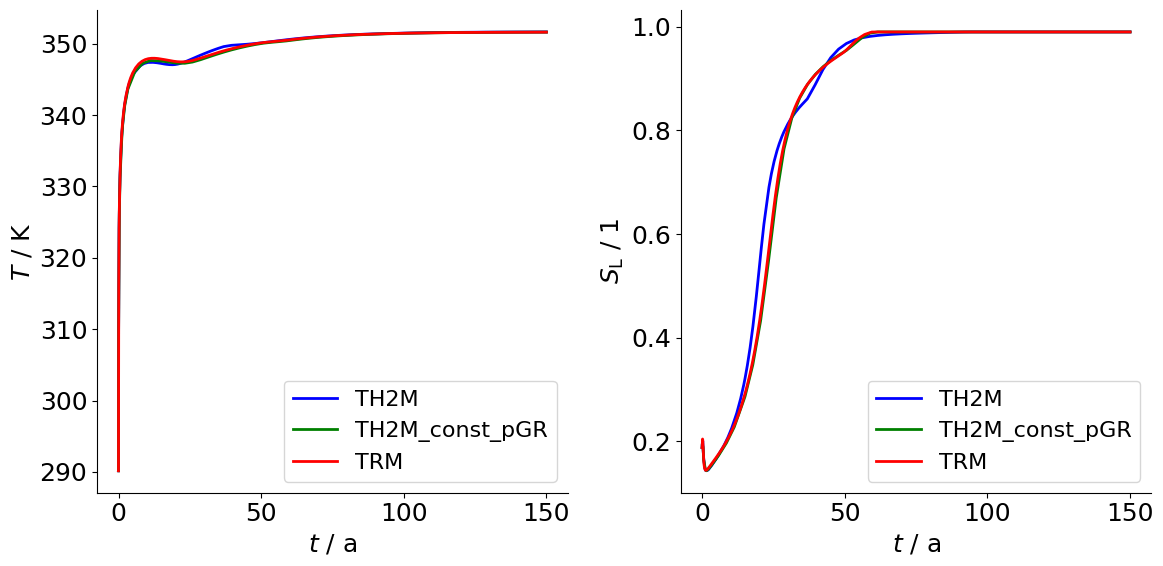

In [12]:
fig, (vax, hax) = plt.subplots(1, 2, figsize=(12, 6))
for file in files:
    vax.plot(pvdobj[file].timesteps/yearsinseconds, results[file]["GBM2"]["temperature"], colors[file], label=file)
    vax.legend()
    vax.set_xlabel("$t$ / a")
    vax.set_ylabel("$T$ / K")
    hax.plot(pvdobj[file].timesteps/yearsinseconds, results[file]["GBM2"]["saturation"], colors[file], label=file)
    hax.legend()
    hax.set_xlabel("$t$ / a")
    hax.set_ylabel("$S_\\text{L}$ / 1")
plt.tight_layout()
plt.savefig("comparison_th2m_trm.pdf")